In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    "Input / Output": ["Input 1", "Input 2", "Input 3", "Output"],
    "Description": ["Symptom Severity", "Test Result Consistency", "Patient History Relevance", "Likelihood of Disease Diagnosis"],
    "Linguistic Variables": [
        "Low, Moderate, High",
        "Inconsistent, Moderately Consistent, Consistent",
        "Irrelevant, Somewhat Relevant, Highly Relevant",
        "Unlikely, Possible, Probable, Highly Probable"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

  Input / Output                      Description  \
0        Input 1                 Symptom Severity   
1        Input 2          Test Result Consistency   
2        Input 3        Patient History Relevance   
3         Output  Likelihood of Disease Diagnosis   

                              Linguistic Variables  
0                              Low, Moderate, High  
1  Inconsistent, Moderately Consistent, Consistent  
2   Irrelevant, Somewhat Relevant, Highly Relevant  
3    Unlikely, Possible, Probable, Highly Probable  


In [ ]:
import numpy as np
import pandas as pd

# Define ranges for each input variable
symptom_severity_levels = np.linspace(0, 10, 100)
test_consistency_levels = np.linspace(0, 10, 100)
patient_history_relevance_levels = np.linspace(0, 10, 100)

# Create meshgrid for all combinations
ss, tc, phr = np.meshgrid(symptom_severity_levels, test_consistency_levels, patient_history_relevance_levels, indexing='ij')

# Flatten the grids to create a long format table where each row is a combination of inputs
data = np.vstack([ss.ravel(), tc.ravel(), phr.ravel()]).T

# Create a DataFrame for better visualization and usage
df = pd.DataFrame(data, columns=['Symptom Severity', 'Test Result Consistency', 'Patient History Relevance'])

# Save the DataFrame to an Excel file for use in other platforms
df.to_excel('fuzzy_input_data.xlsx', index=False)

# Provide a link to download the Excel file if running in a Google Colab environment (uncomment if needed)
# from google.colab import files
# files.download('fuzzy_input_data.xlsx')

In [ ]:
import pandas as pd

# Define center or peak points of trapezoidal membership functions for each input
# These points are chosen to ideally activate each rule. These might be approximations.

# Symptom Severity (Very Low, Low, Medium, High, Very High)
ss_points = [1.75, 2.25, 4.75, 7.5, 8.75]  # Midpoints of the flat top of trapezoids

# Test Result Consistency (Very Inconsistent, Inconsistent, Moderately Consistent, Consistent, Very Consistent)
tc_points = [1.75, 2.25, 4.75, 7.5, 8.75]

# Patient History Relevance (Very Irrelevant, Irrelevant, Somewhat Relevant, Relevant, Highly Relevant)
phr_points = [1.75, 2.25, 4.75, 7.5, 8.75]

# Generate combinations of these points to align with the rules specified
data = []
for ss in ss_points:
    for tc in tc_points:
        for phr in phr_points:
            data.append([ss, tc, phr])

# Convert to DataFrame for better usability and visibility
df = pd.DataFrame(data, columns=['Symptom Severity', 'Test Result Consistency', 'Patient History Relevance'])

# Save the data to an Excel file
df.to_excel('/content/drive/MyDrive/Colab Notebooks/data/rule_activation_data.xlsx', index=False)

print(df.head())

   Symptom Severity  Test Result Consistency  Patient History Relevance
0              1.75                     1.75                       1.75
1              1.75                     1.75                       2.25
2              1.75                     1.75                       4.75
3              1.75                     1.75                       7.50
4              1.75                     1.75                       8.75


In [ ]:
import numpy as np
import pandas as pd

# Define the ranges for each input based on the defined membership functions
num_samples = 50  # You can increase this for finer granularity
symptom_severity = np.linspace(0, 10, num_samples)
test_result_consistency = np.linspace(0, 10, num_samples)
patient_history_relevance = np.linspace(0, 10, num_samples)

# Use meshgrid to create a dense grid of input values
SS, TC, PHR = np.meshgrid(symptom_severity, test_result_consistency, patient_history_relevance, indexing='ij')

# Flatten the arrays to create a long format table where each row is a combination of inputs
data = np.column_stack((SS.ravel(), TC.ravel(), PHR.ravel()))

# Create a DataFrame for easier handling
df = pd.DataFrame(data, columns=['Symptom Severity', 'Test Result Consistency', 'Patient History Relevance'])

# Save the DataFrame to an Excel file for use in MATLAB or other platforms
df.to_excel('fuzzy_test_data.xlsx', index=False)

# Print some information
print(f"Data shape: {df.shape}")
print("First 5 rows of the generated data:")
print(df.head())

Data shape: (125000, 3)
First 5 rows of the generated data:
   Symptom Severity  Test Result Consistency  Patient History Relevance
0               0.0                      0.0                   0.000000
1               0.0                      0.0                   0.204082
2               0.0                      0.0                   0.408163
3               0.0                      0.0                   0.612245
4               0.0                      0.0                   0.816327


In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=009d0c1328f0f3d0ddd757b4a79785944b1b2e849b3f38ea2b1afdd285b6b704
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


9.141176470588237


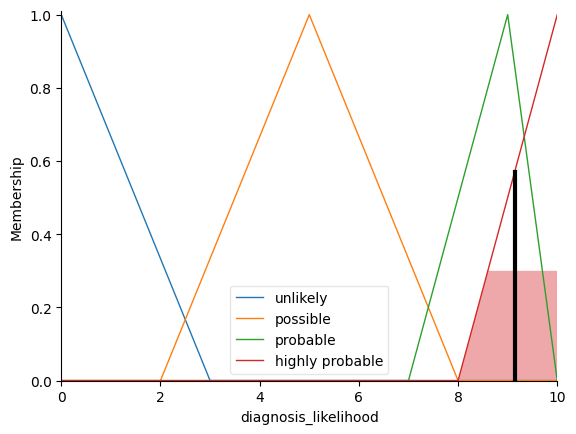

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership functions
symptom_severity = ctrl.Antecedent(np.arange(0, 11, 1), 'symptom_severity')
test_consistency = ctrl.Antecedent(np.arange(0, 11, 1), 'test_consistency')
history_relevance = ctrl.Antecedent(np.arange(0, 11, 1), 'history_relevance')
diagnosis_likelihood = ctrl.Consequent(np.arange(0, 11, 1), 'diagnosis_likelihood')

# Auto-membership function population is possible with .automf(3, 5, or 7)
symptom_severity.automf(3, names=['low', 'moderate', 'high'])
test_consistency.automf(3, names=['inconsistent', 'moderately consistent', 'consistent'])
history_relevance.automf(3, names=['irrelevant', 'somewhat relevant', 'highly relevant'])

# Custom membership functions can be built interactively with a familiar, Pythonic API
diagnosis_likelihood['unlikely'] = fuzz.trimf(diagnosis_likelihood.universe, [0, 0, 3])
diagnosis_likelihood['possible'] = fuzz.trimf(diagnosis_likelihood.universe, [2, 5, 8])
diagnosis_likelihood['probable'] = fuzz.trimf(diagnosis_likelihood.universe, [7, 9, 10])
diagnosis_likelihood['highly probable'] = fuzz.trimf(diagnosis_likelihood.universe, [8, 10, 10])

# Rules
rule1 = ctrl.Rule(symptom_severity['high'] & test_consistency['consistent'] & history_relevance['highly relevant'], diagnosis_likelihood['highly probable'])
rule2 = ctrl.Rule(symptom_severity['low'] | test_consistency['inconsistent'], diagnosis_likelihood['unlikely'])

# Control System Creation and Simulation
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2])
diagnosis = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Passing inputs to the ControlSystem using Antecedent labels with Pythonic API
diagnosis.input['symptom_severity'] = 6.5
diagnosis.input['test_consistency'] = 6.5
diagnosis.input['history_relevance'] = 6.5

# Crunch the numbers
diagnosis.compute()

print(diagnosis.output['diagnosis_likelihood'])
diagnosis_likelihood.view(sim=diagnosis)

In [ ]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of pseudo data points
num_data_points = 100

# Generate pseudo patient data for the three inputs
# Assume that these inputs are normally distributed around a mean value, which is a common assumption for pseudo data generation.

# Symptom Severity ranges from 0 to 10, with most patients having moderate severity
symptom_severity = np.random.normal(loc=5, scale=2, size=num_data_points)
symptom_severity = np.clip(symptom_severity, 0, 10)  # Ensure values are within bounds

# Test Result Consistency also ranges from 0 to 10, with most results being moderately consistent
test_consistency = np.random.normal(loc=5, scale=2, size=num_data_points)
test_consistency = np.clip(test_consistency, 0, 10)  # Ensure values are within bounds

# Patient History Relevance ranges from 0 to 10, with a spread of relevancies
history_relevance = np.random.normal(loc=5, scale=2, size=num_data_points)
history_relevance = np.clip(history_relevance, 0, 10)  # Ensure values are within bounds

# Create a DataFrame to hold the pseudo patient data
pseudo_patient_data = pd.DataFrame({
    'Symptom Severity': symptom_severity,
    'Test Result Consistency': test_consistency,
    'Patient History Relevance': history_relevance
})

pseudo_patient_data.head()
# Print the entire DataFrame to the console
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(pseudo_patient_data)

file_path = '/content/drive/MyDrive/Colab Notebooks/data/pseudo_patient_data.csv'  # Path in Google Drive where you want to save the file
pseudo_patient_data.to_csv(file_path, index=False)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Generate pseudo patient data again as the previous data was not saved due to an error.
np.random.seed(0)  # Ensure reproducibility
num_data_points = 100
symptom_severity = np.clip(np.random.normal(5, 2, num_data_points), 0, 10)
test_consistency = np.clip(np.random.normal(5, 2, num_data_points), 0, 10)
history_relevance = np.clip(np.random.normal(5, 2, num_data_points), 0, 10)
pseudo_patient_data = pd.DataFrame({
    'Symptom Severity': symptom_severity,
    'Test Result Consistency': test_consistency,
    'Patient History Relevance': history_relevance
})

# Descriptive Statistics
descriptive_stats = pseudo_patient_data.describe()

# Shapiro-Wilk Test
sw_test_results = {col: shapiro(pseudo_patient_data[col]) for col in pseudo_patient_data.columns}

# Null Values Check
null_values = pseudo_patient_data.isnull().sum()

# Outlier Detection
z_scores = np.abs((pseudo_patient_data - pseudo_patient_data.mean()) / pseudo_patient_data.std())
outliers_detected = (z_scores > 3).sum()

# Assembling the results
preliminary_tests_results = {
    'Descriptive Statistics': descriptive_stats,
    'Shapiro-Wilk Test': sw_test_results,
    'Null Values': null_values,
    'Outliers': outliers_detected
}

preliminary_tests_results

{'Descriptive Statistics':        Symptom Severity  Test Result Consistency  Patient History Relevance
 count        100.000000               100.000000                 100.000000
 mean           5.120676                 5.164026                   4.886987
 std            2.023184                 2.079759                   1.898699
 min            0.000000                 0.553194                   0.000000
 25%            3.712287                 3.509140                   3.806871
 50%            5.188192                 5.049310                   4.849282
 75%            6.474155                 6.694960                   6.077313
 max            9.539509                 9.766290                   9.607833,
 'Shapiro-Wilk Test': {'Symptom Severity': ShapiroResult(statistic=0.992516040802002, pvalue=0.8572329878807068),
  'Test Result Consistency': ShapiroResult(statistic=0.9735487699508667, pvalue=0.04156402125954628),
  'Patient History Relevance': ShapiroResult(statistic=0.9909981

In [ ]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of data points
num_data_points = 150

# Generate pseudo patient data for the three inputs, scaled between 0 and 10
symptom_severity = np.random.rand(num_data_points) * 10
test_result_consistency = np.random.rand(num_data_points) * 10
patient_history_relevance = np.random.rand(num_data_points) * 10

# Create a DataFrame to hold the pseudo patient data
pseudo_patient_data = pd.DataFrame({
    'Symptom Severity': symptom_severity,
    'Test Result Consistency': test_result_consistency,
    'Patient History Relevance': patient_history_relevance
})

# Save the DataFrame to an Excel file
excel_file_path = 'pseudo_patient_data.xlsx'
pseudo_patient_data.to_excel(excel_file_path, index=False)

# Return the file path for download
excel_file_path

'pseudo_patient_data.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of data points
num_data_points = 1000

# Generate random data points for 'Symptom Severity', 'Test Result Consistency', and 'Patient History Relevance'
# Assuming the range for each input variable is from 0 to 10
data = np.random.uniform(0, 10, (num_data_points, 3))

# Pre-analysis: calculate mean and standard deviation before normalisation
mean_vals = np.mean(data, axis=0)
std_vals = np.std(data, axis=0)

# Perform normalisation using Min-Max scaling to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 10))
normalised_data = scaler.fit_transform(data)

# Convert the normalised data to a DataFrame
columns = ['Symptom Severity', 'Test Result Consistency', 'Patient History Relevance']
normalised_df = pd.DataFrame(normalised_data, columns=columns)

# Save the DataFrame to a new Excel file
output_file = 'comprehensive_data_points.xlsx'
normalised_df.to_excel(output_file, index=False)

# Output the pre-analysis stats and the path to the saved file
pre_analysis_stats = {'mean': mean_vals.tolist(), 'std': std_vals.tolist()}
pre_analysis_stats, output_file

({'mean': [5.053773544111949, 4.9855692912724505, 5.087853797068981],
  'std': [2.9825306921876664, 2.914382080630865, 2.867445109758321]},
 'comprehensive_data_points.xlsx')